# Title of ML Project: Car Price Prediction Using Machine Learning¶

# Presented by: Jisha Varghese (Data Science Enthusiast)

# 1. Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

# 2. Objective:
To develop a predictive model for car pricing in the American market by analyzing the significant factors influencing car prices. The model aims to provide insights into how various independent variables impact pricing, enabling the automobile company to optimize car design, manufacturing, and business strategies for competitive pricing in the US market.

# 3. Data Description:

Source:
The dataset has been compiled by an automobile consulting firm based on extensive market surveys conducted across the American automotive market. It provides comprehensive information about various car features and their corresponding prices, specifically tailored for analyzing pricing dynamics.

Features:
The dataset contains the following features (columns) related to different types of cars in the American market:

Car_ID: Unique car identifier.
CarName: Brand and model.
FuelType: Type of fuel (petrol/diesel/gas).
BodyStyle: Car body type (sedan, hatchback, etc.).
DriveWheel: Drivetrain type (FWD/RWD/AWD).
EngineSize: Engine capacity (cc).
Horsepower: Maximum power output.
CityMPG: Fuel efficiency in city (mpg).
HighwayMPG: Fuel efficiency on highways (mpg).
Price: Market price (target variable).

# 4. Data Collection:

In [295]:
# Essential libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for regression and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

# Warnings
import warnings
warnings.filterwarnings("ignore")


## Import Dataset

In [297]:

# Load the dataset
dataset = pd.read_csv('CarPrice_Assignment.csv')


In [299]:
df=pd.DataFrame(dataset)
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower

### Basic Information and Structure of the Data

In [33]:

print("Dataset Info:")
print(df.info())  # Displays data types and non-null counts


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null

### Inspect Data Distribution and Outliers:

In [45]:
# Get summary statistics
print("Summary Statistics:")
print(df.describe())  # Displays statistical summary of numerical columns


Summary Statistics:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   4

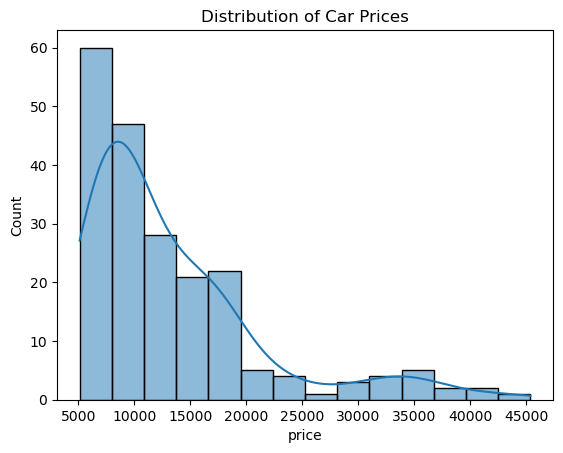

In [49]:
# Visualize the distribution of the target variable (Price)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()


## Gain Insights into the Data Distribution, Relationships, and Potential Patterns:

### Numerical columns and Categorical columns identified

In [80]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [58]:
print('numerical_columns:',numerical_columns)

numerical_columns: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [60]:
print('categorical_columns:', categorical_columns)

categorical_columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


### Distribution of Numerical Features:


The histogram of car prices shows a right-skewed distribution with most cars priced lower, a few high-priced outliers, and a concentration of values within a specific range, indicating potential skewness that may require transformation or outlier handling.

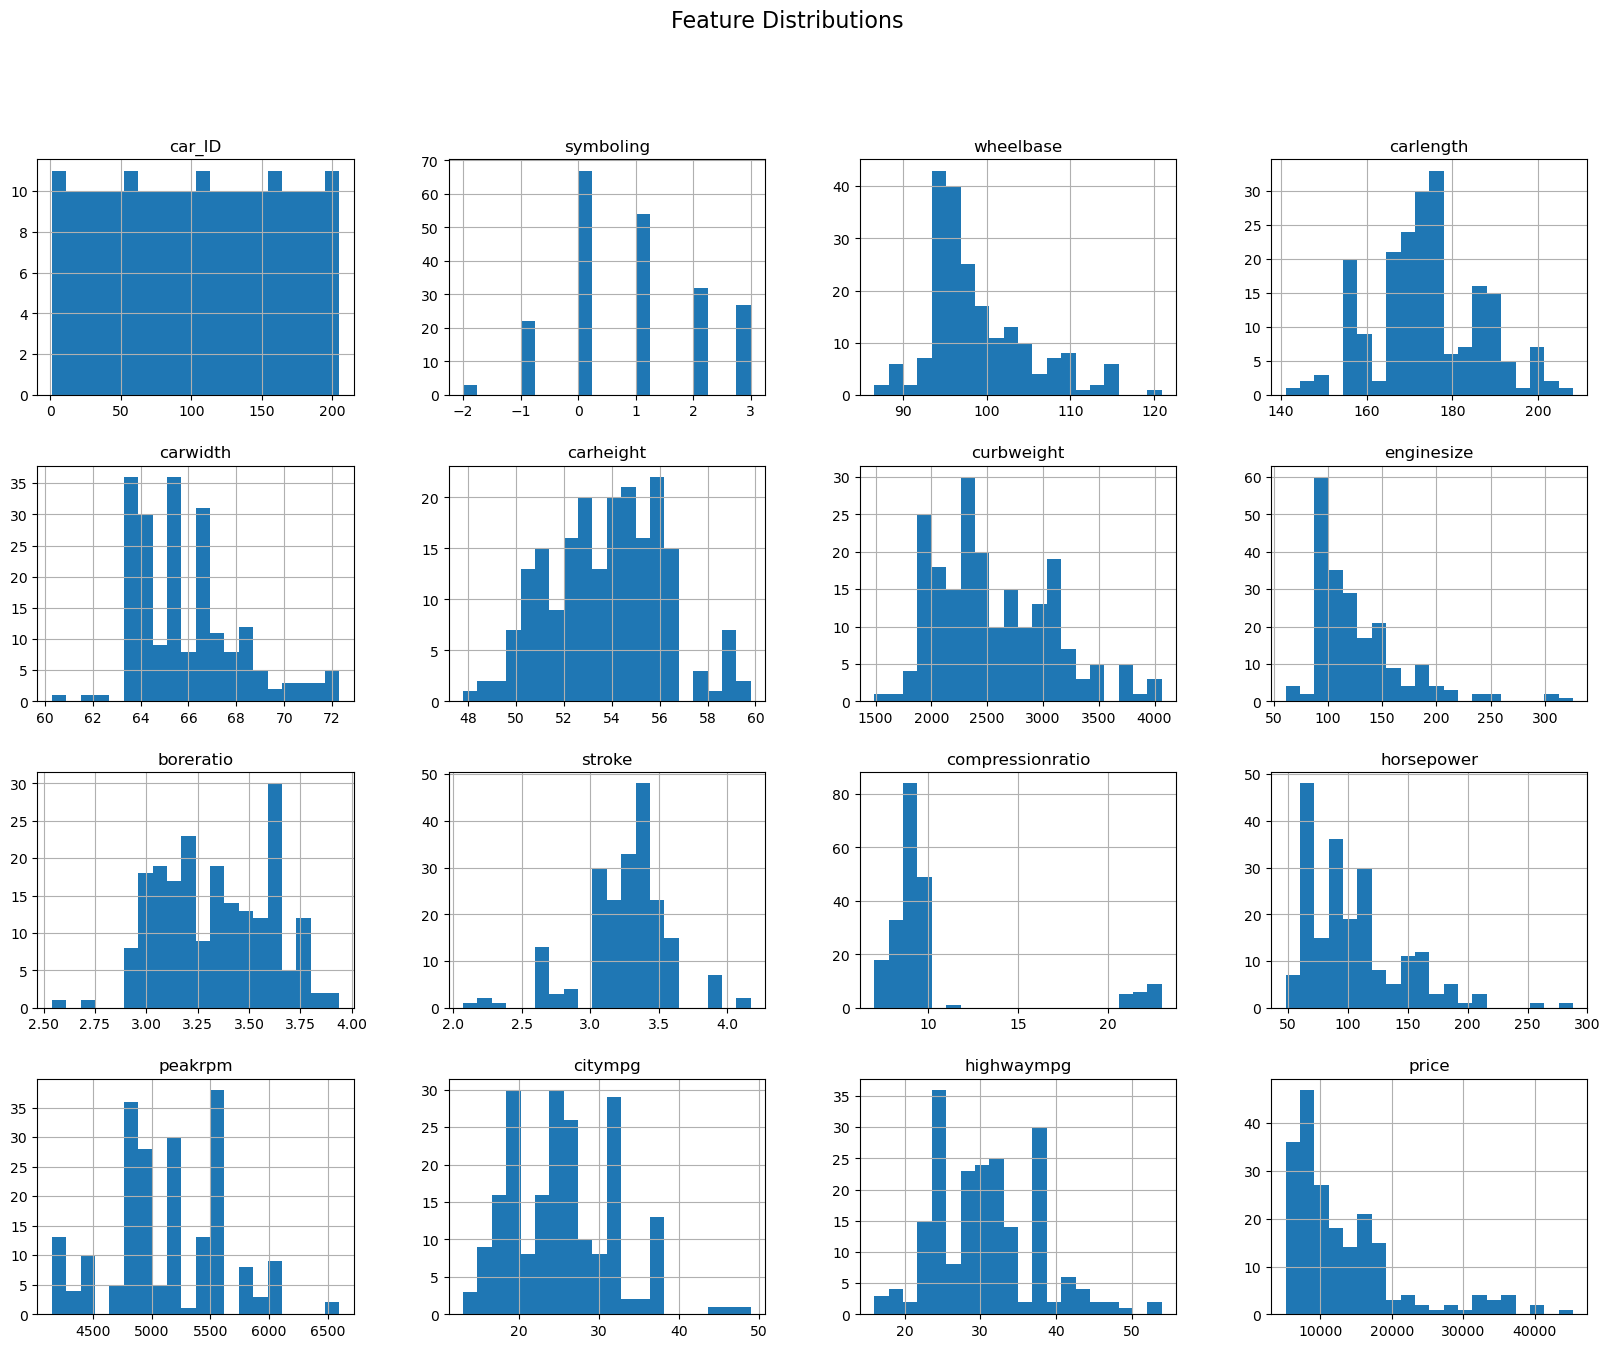

In [65]:
# Plot histograms for each feature
df.hist(figsize=(20, 15), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


### Relationships and Patterns:
Used a correlation heatmap and pair plot to identify relationships and dependencies among features.

In [86]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])


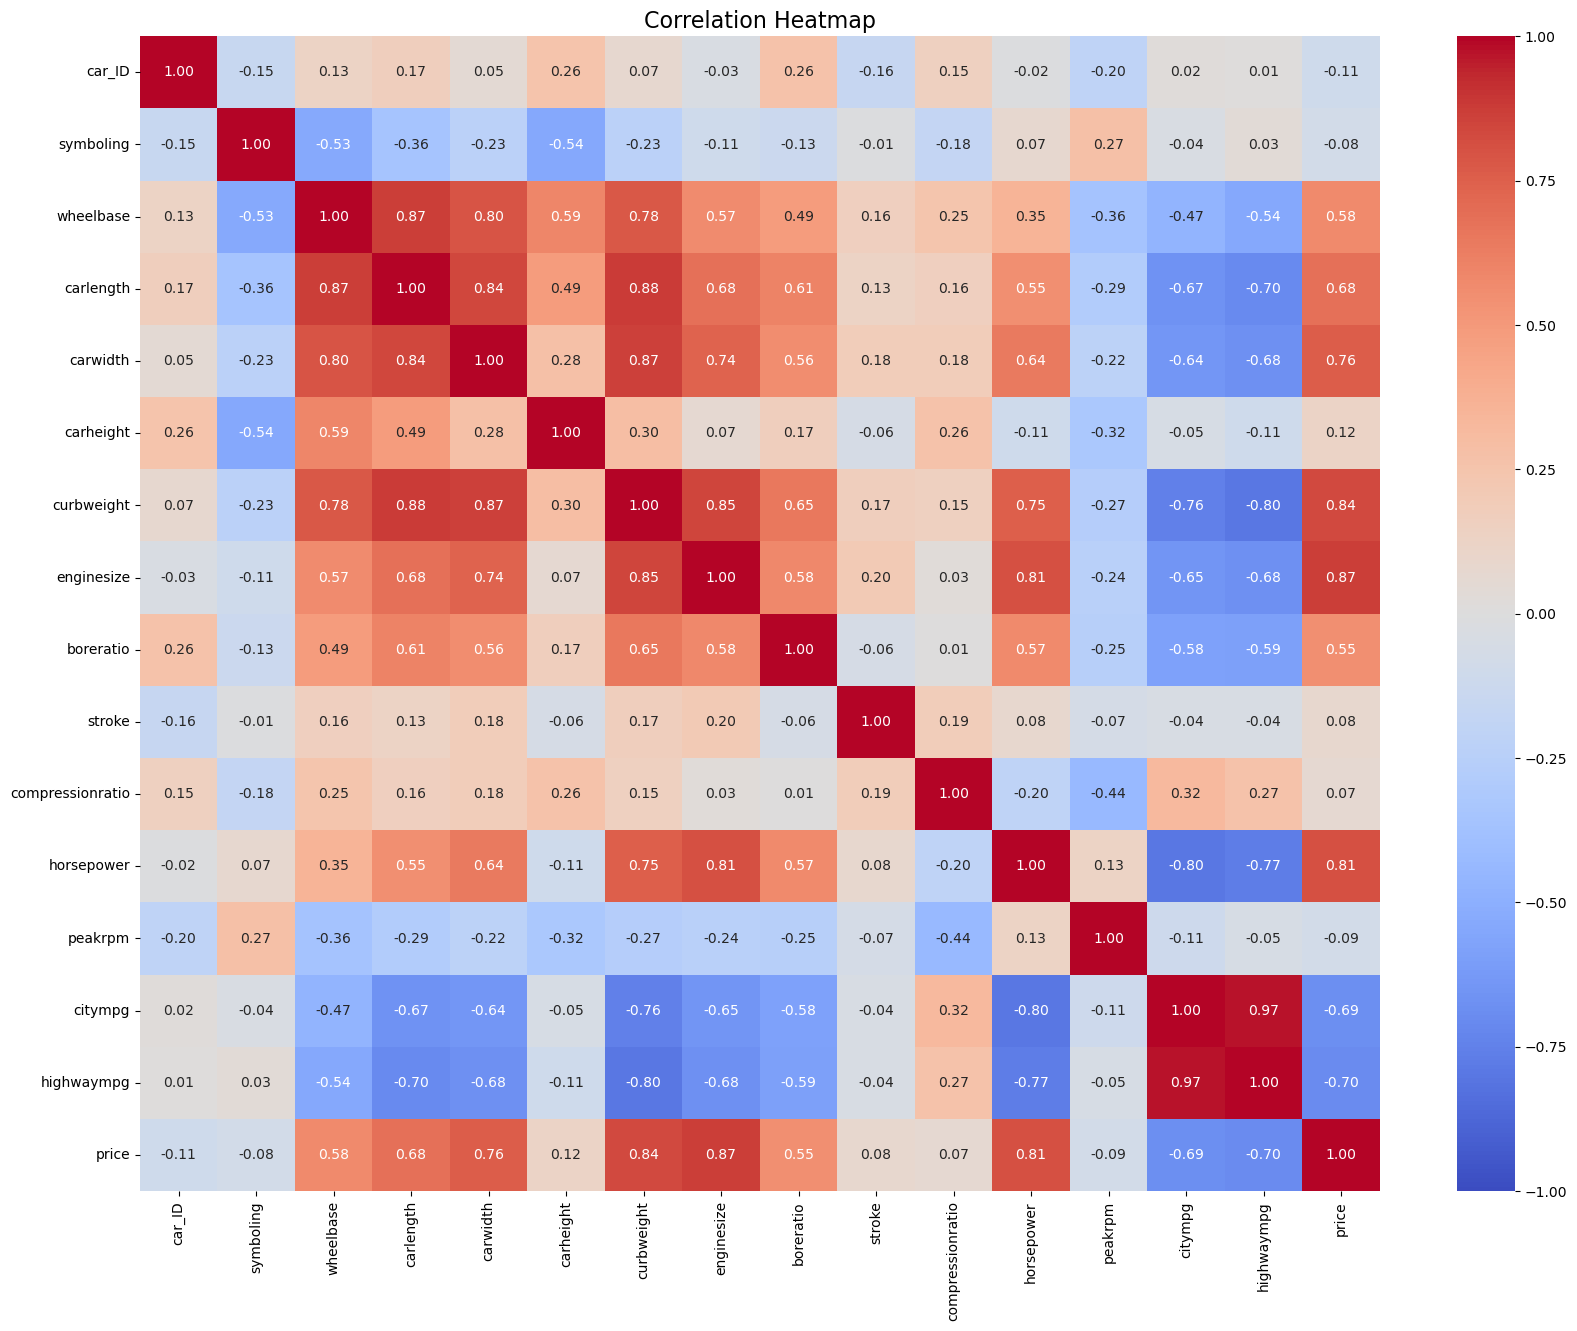

In [88]:
# Calculate the correlation matrix
corr = numerical_df.corr()

# Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Pair plot for selected features to explore relationships

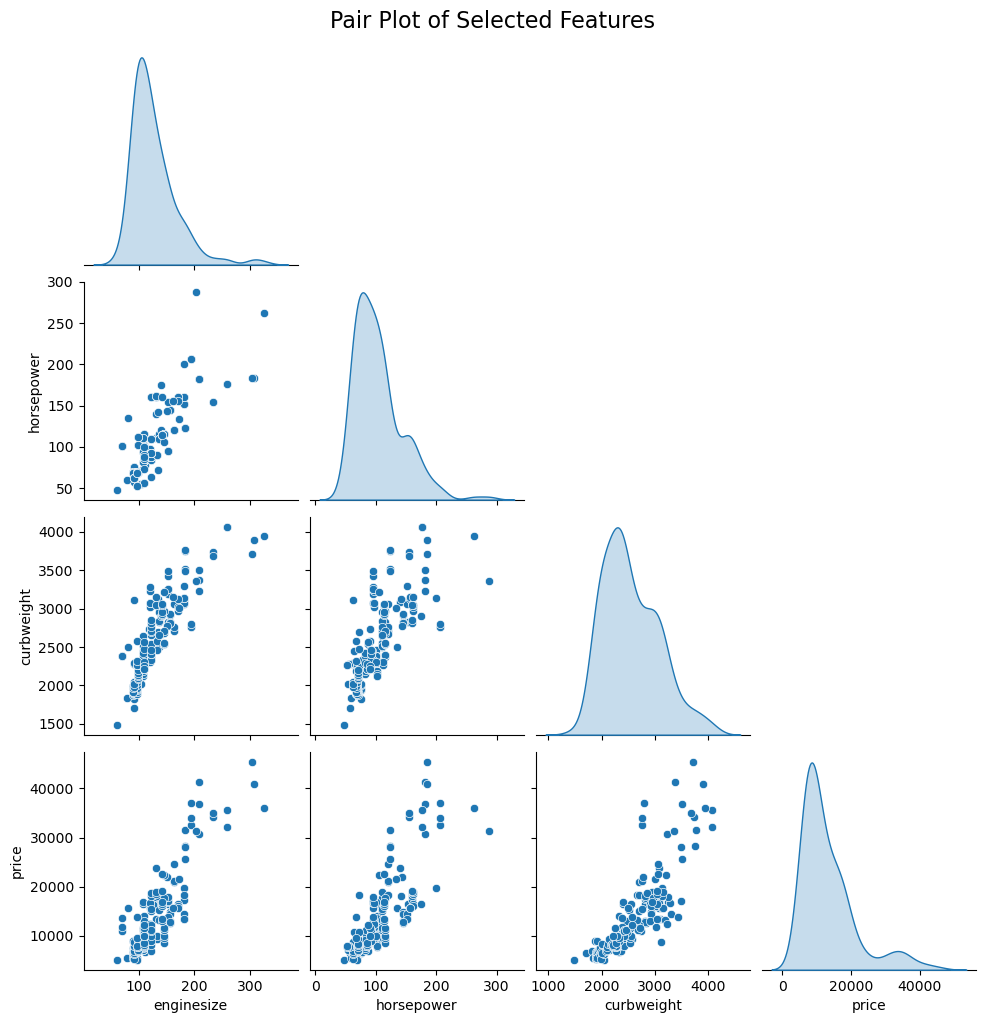

In [92]:
# Select specific features for the pair plot
selected_features = ['enginesize', 'horsepower', 'curbweight', 'price']

# Pair plot for selected features to explore relationships
sns.pairplot(df, vars=selected_features, diag_kind='kde', corner=True, palette='Set2')
plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=16)
plt.show()


### Potential Patterns:
Box plots reveal significant differences in features like enginesize, horsepower, and curbweight across categories like fueltype, highlighting potential patterns in car specifications influencing pricing.

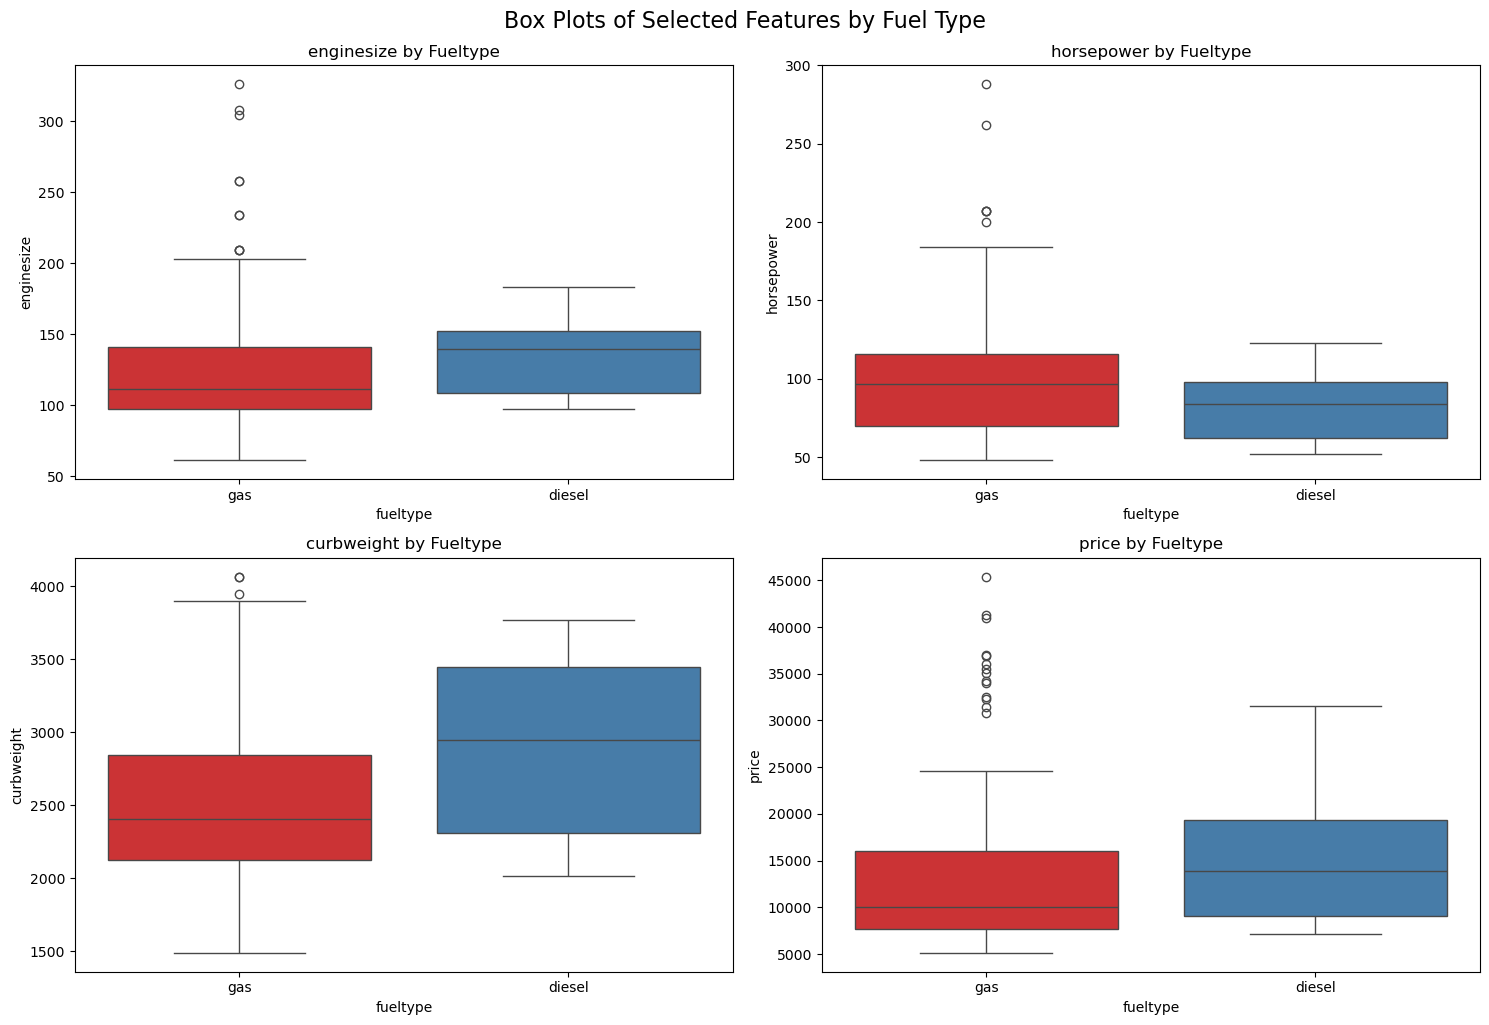

In [100]:
# Box plot to examine differences in key features by a categorical variable
plt.figure(figsize=(15, 10))

# Specify selected numerical features and a relevant categorical variable (e.g., 'fueltype')
selected_features = ['enginesize', 'horsepower', 'curbweight', 'price']
categorical_feature = 'fueltype'

# Create subplots for each feature
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)  # Adjust layout (2 rows, 2 columns)
    sns.boxplot(x=categorical_feature, y=feature, data=df, palette='Set1')
    plt.title(f"{feature} by {categorical_feature.capitalize()}")
    
# Improve layout
plt.tight_layout()
plt.suptitle("Box Plots of Selected Features by Fuel Type", y=1.02, fontsize=16)
plt.show()


### Scatter plot for two highly correlated features by a categorical variable

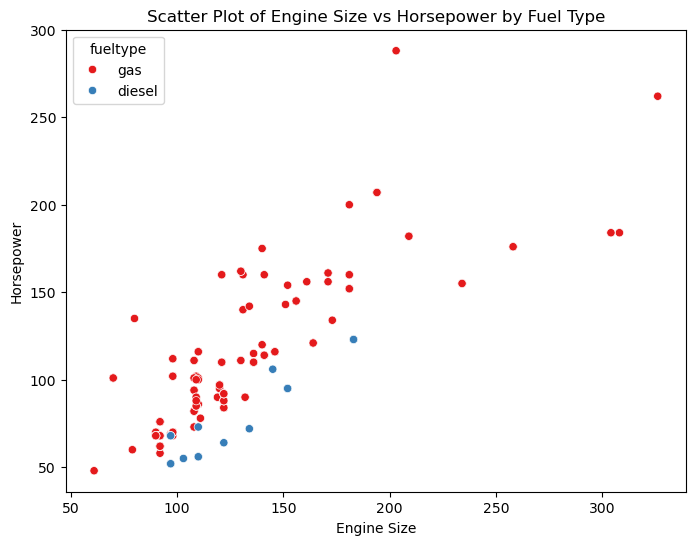

In [102]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='enginesize', y='horsepower', hue='fueltype', data=df, palette='Set1')
plt.title("Scatter Plot of Engine Size vs Horsepower by Fuel Type")
plt.xlabel("Engine Size")
plt.ylabel("Horsepower")
plt.show()


# 5. Data Preprocessing - Data Cleaning:
### Check for Missing Values

### Missing Values and duplicated values: Checked for missing data; if present, would use imputation techniques like mean or median.

In [111]:
print("Missing Values:")
print(df.isnull().sum())  # Sum of missing values for each column


Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Check for Duplicates

In [130]:
# Check for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


### - Check for and remove outliers using statistical methods.

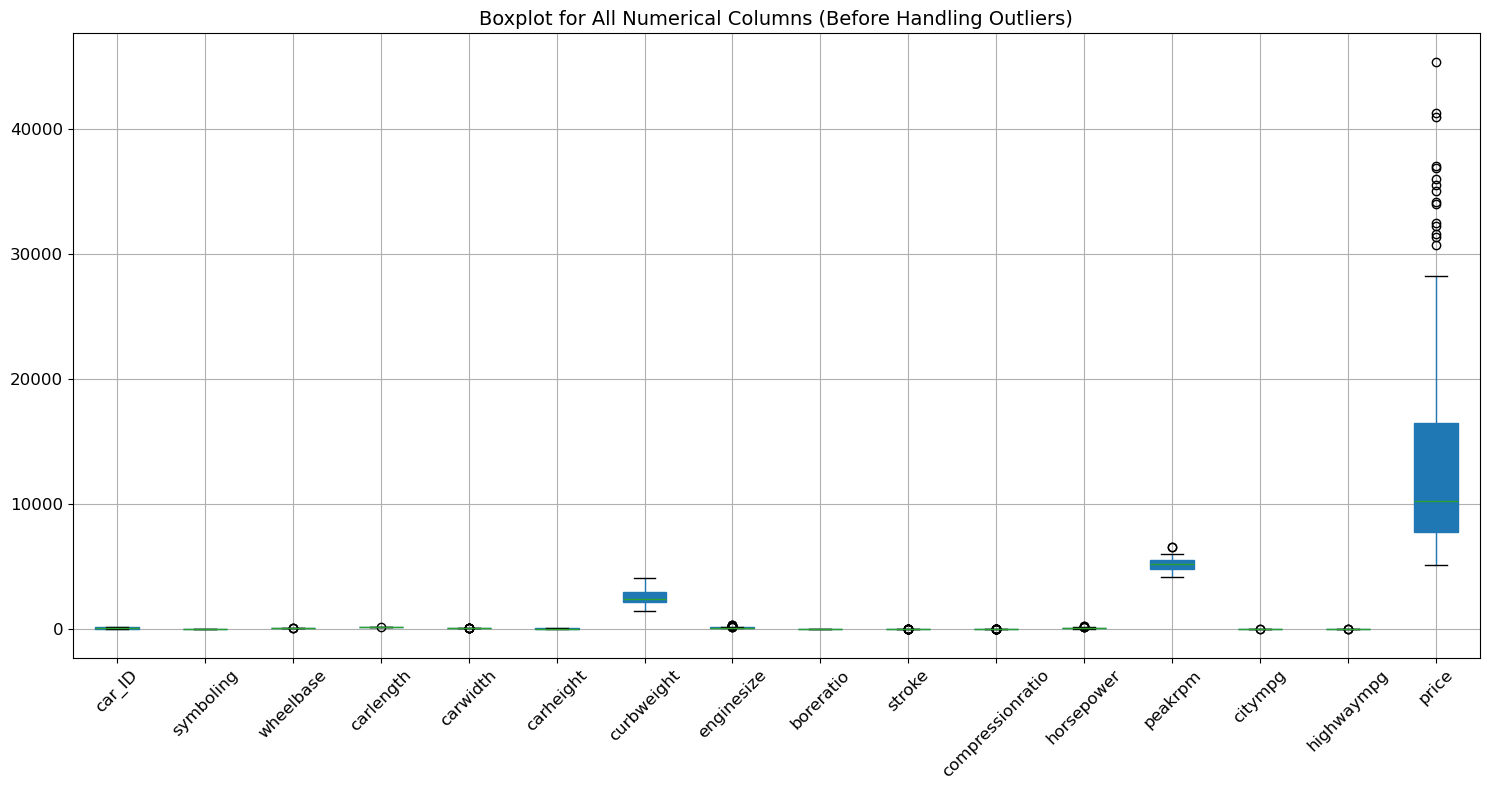

In [137]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Boxplot for all numerical columns before handling outliers
plt.figure(figsize=(15, 8))  
df[numerical_columns].boxplot(rot=45, patch_artist=True)  # Single box plot for all numerical columns
plt.title('Boxplot for All Numerical Columns (Before Handling Outliers)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()


### Outliers Removal

In [301]:
df_new = df.copy() # Create a copy of the DataFrame

# Loop through all numerical columns to calculate IQR and cap outliers
for col in numerical_columns:

    Q1 = df[col].quantile(0.25) # (25th percentile)
    Q3 = df[col].quantile(0.75) # (75th percentile)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap the outliers to the lower and upper limits (Capping Method used)
    df_new[col] = df_new[col].clip(lower=lower_limit, upper=upper_limit)
    
 
    print(f"Column: {col}")
    print(f"  Lower Limit: {lower_limit}")
    print(f"  Upper Limit: {upper_limit}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print("-" * 40)  # Separator for readability


Column: car_ID
  Lower Limit: -101.0
  Upper Limit: 307.0
  Q1: 52.0
  Q3: 154.0
  IQR: 102.0
----------------------------------------
Column: symboling
  Lower Limit: -3.0
  Upper Limit: 5.0
  Q1: 0.0
  Q3: 2.0
  IQR: 2.0
----------------------------------------
Column: wheelbase
  Lower Limit: 82.64999999999999
  Upper Limit: 114.25000000000001
  Q1: 94.5
  Q3: 102.4
  IQR: 7.900000000000006
----------------------------------------
Column: carlength
  Lower Limit: 141.10000000000002
  Upper Limit: 208.29999999999995
  Q1: 166.3
  Q3: 183.1
  IQR: 16.799999999999983
----------------------------------------
Column: carwidth
  Lower Limit: 59.89999999999998
  Upper Limit: 71.10000000000002
  Q1: 64.1
  Q3: 66.9
  IQR: 2.8000000000000114
----------------------------------------
Column: carheight
  Lower Limit: 46.75
  Upper Limit: 60.75
  Q1: 52.0
  Q3: 55.5
  IQR: 3.5
----------------------------------------
Column: curbweight
  Lower Limit: 960.0
  Upper Limit: 4120.0
  Q1: 2145.0
  Q3

### After outliers removal

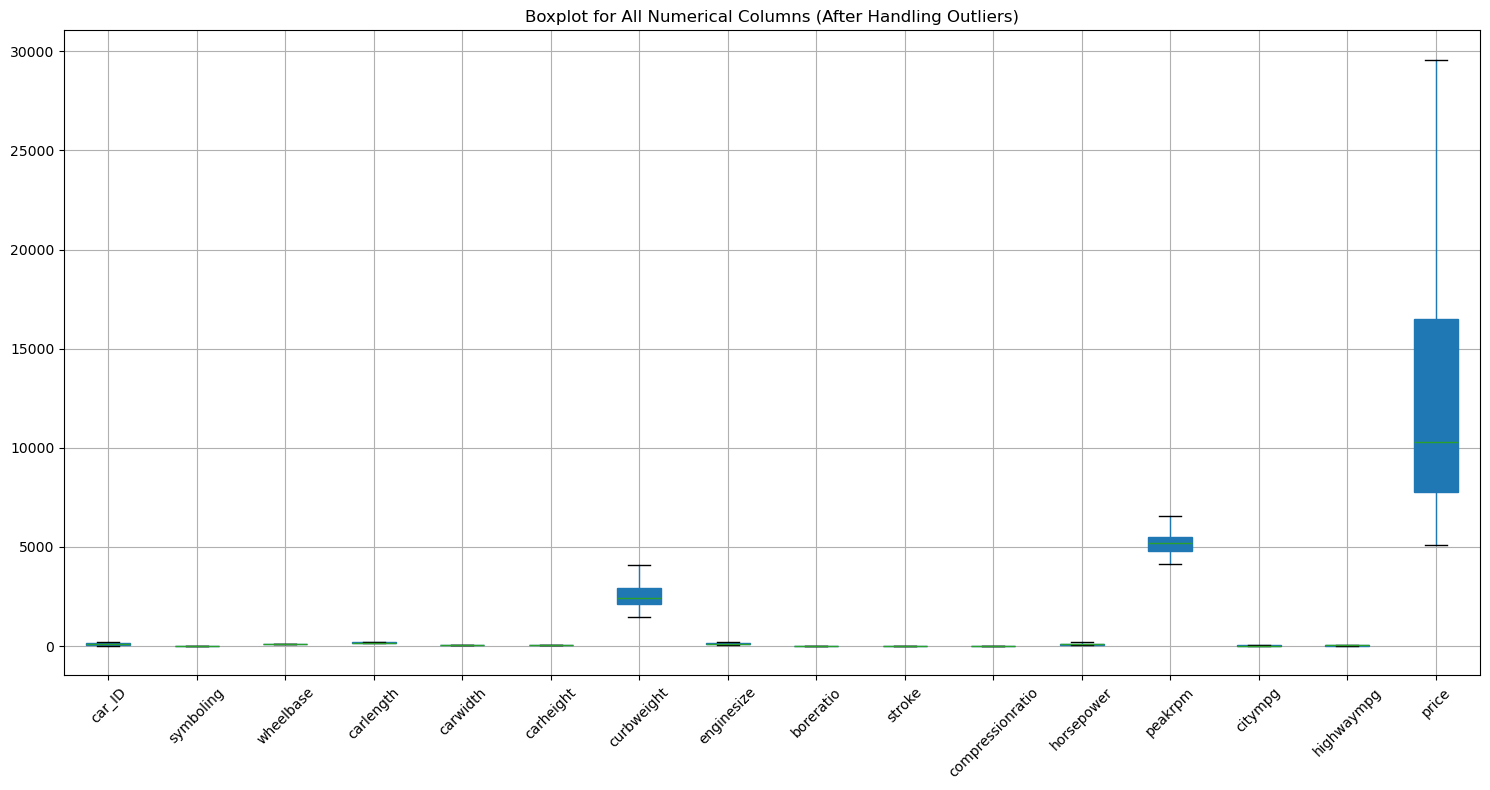

In [144]:
plt.figure(figsize=(15, 8))
df_new[numerical_columns].boxplot(rot=45, patch_artist=True)
plt.title('Boxplot for All Numerical Columns (After Handling Outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Address skewed data in numerical features through transformations.

In [303]:
from sklearn.preprocessing import PowerTransformer

# Separate numerical and non-numerical columns
numerical_columns = df_new.select_dtypes(include=['number']).columns
non_numerical_columns = df_new.select_dtypes(exclude=['number']).columns

# Apply PowerTransformer only to numerical columns
pt = PowerTransformer()
df_new[numerical_columns] = pt.fit_transform(df_new[numerical_columns])

# Combine back the non-numerical columns
df_transformed = df_new.copy()
df_transformed[non_numerical_columns] = df_new[non_numerical_columns]

# Print the transformed data to inspect
print("Transformed Data (After PowerTransformer):")
print(df_transformed.head())


Transformed Data (After PowerTransformer):
     car_ID  symboling                   CarName fueltype aspiration  \
0 -2.080970   1.637336        alfa-romero giulia      gas        std   
1 -2.035319   1.637336       alfa-romero stelvio      gas        std   
2 -1.993838   0.194880  alfa-romero Quadrifoglio      gas        std   
3 -1.955206   0.939497               audi 100 ls      gas        std   
4 -1.918703   0.939497                audi 100ls      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front  -2.388079  ...   
1        two  convertible        rwd          front  -2.388079  ...   
2        two    hatchback        rwd          front  -0.703782  ...   
3       four        sedan        fwd          front   0.364326  ...   
4       four        sedan        4wd          front   0.294959  ...   

   enginesize  fuelsystem  boreratio    stroke compressionratio horsepower  \
0    0.378551      

# 6. Exploratory Data Analysis (EDA):


EDA is about understanding the data in-depth so we can make insightful, data-driven decisions that enhance our model.
Goal: Dive deeper into the data to gain insights, spot patterns, and understand feature relationships.
Tasks: Visualize distributions, examine feature relationships, understand the structure of the data,check feature importance, and identify patterns that may influence modeling.
Outcome: A well-rounded understanding of the dataset, which guides feature selection, transformation, and model-building decisions.

## Gain insights into the data distribution, relationships, and potential patterns.

### i) Data Distribution
Purpose: To understand how values of features like enginesize, horsepower, curbweight, and price are distributed. This helps identify skewness, peaks, or unusual patterns in the data.

### Techniques:

Histograms: Visualize the frequency of values in features like price or enginesize.
Boxplots: Highlight the spread, median, and outliers in features like curbweight or horsepower.
Kernel Density Estimation (KDE): Shows a smooth curve of feature distributions, useful for continuous variables like price.
KDE with Histogram: Combines both for detailed visualization of data patterns.

### Histograms Without KDE

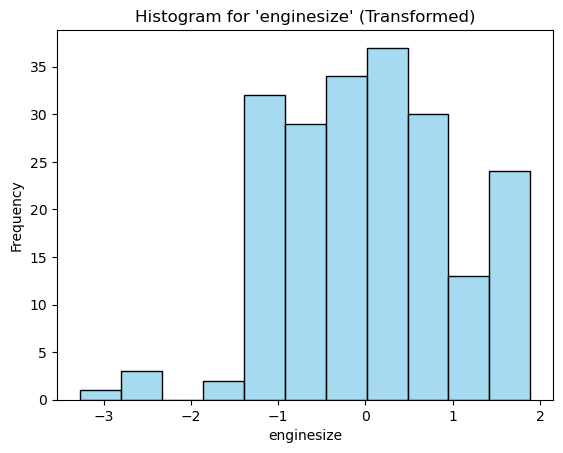

In [166]:
# Example feature for visualization 
feature = 'enginesize'  # Example feature from the transformed dataset ,here selecte enginesize

sns.histplot(df_transformed[feature], kde=False, color='skyblue')
plt.title(f"Histogram for '{feature}' (Transformed)")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.show()


### Histograms With KDE

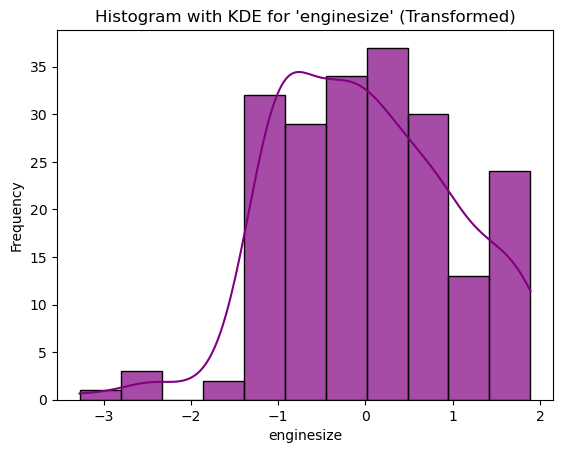

In [168]:
# 2. Histogram with KDE
sns.histplot(df_transformed[feature], kde=True, color='purple', alpha=0.7)
plt.title(f"Histogram with KDE for '{feature}' (Transformed)")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.show()


### Standalone KDE plot

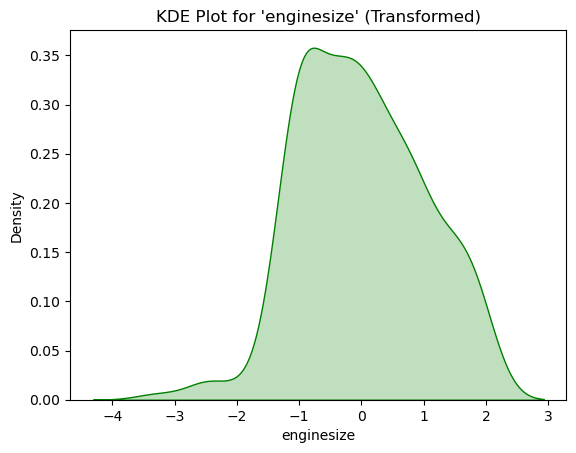

In [172]:

sns.kdeplot(df_transformed[feature], fill=True, color='green')
plt.title(f"KDE Plot for '{feature}' (Transformed)")
plt.xlabel(feature)
plt.ylabel("Density")
plt.show()

### Boxplot for outlier detection and spread

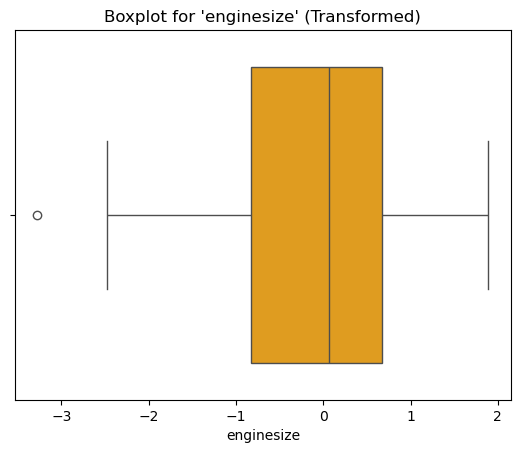

In [174]:

sns.boxplot(x=df_transformed[feature], color='orange')
plt.title(f"Boxplot for '{feature}' (Transformed)")
plt.xlabel(feature)
plt.show()


### (ii) Relationships Between Features¶

### Purpose: 
Understand how features like enginesize, horsepower, and price relate to each other. This helps in identifying highly correlated features, which may be redundant or significant for predictions.

### Techniques:

Correlation Matrix & Heatmap: Displays how strongly numerical features are related to each other.
Pair Plot: Visualizes scatter plots for feature pairs to identify patterns or clusters in the data.


### Select Only Numerical Columns

In [305]:
# Select only numerical columns
numerical_df = df_transformed.select_dtypes(include=['float64', 'int64'])

# Print to verify numerical features
print("Numerical features selected for visualization:")
print(numerical_df.columns)


Numerical features selected for visualization:
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


### Correlation Heatmap

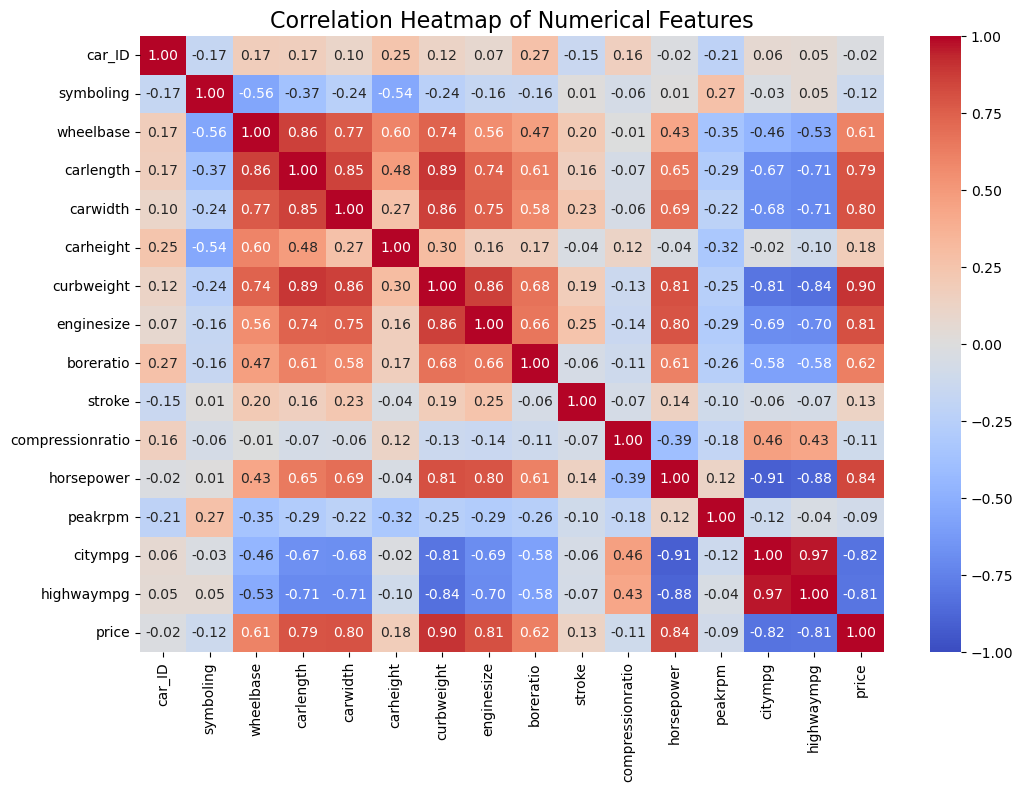

In [187]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


### pair plot

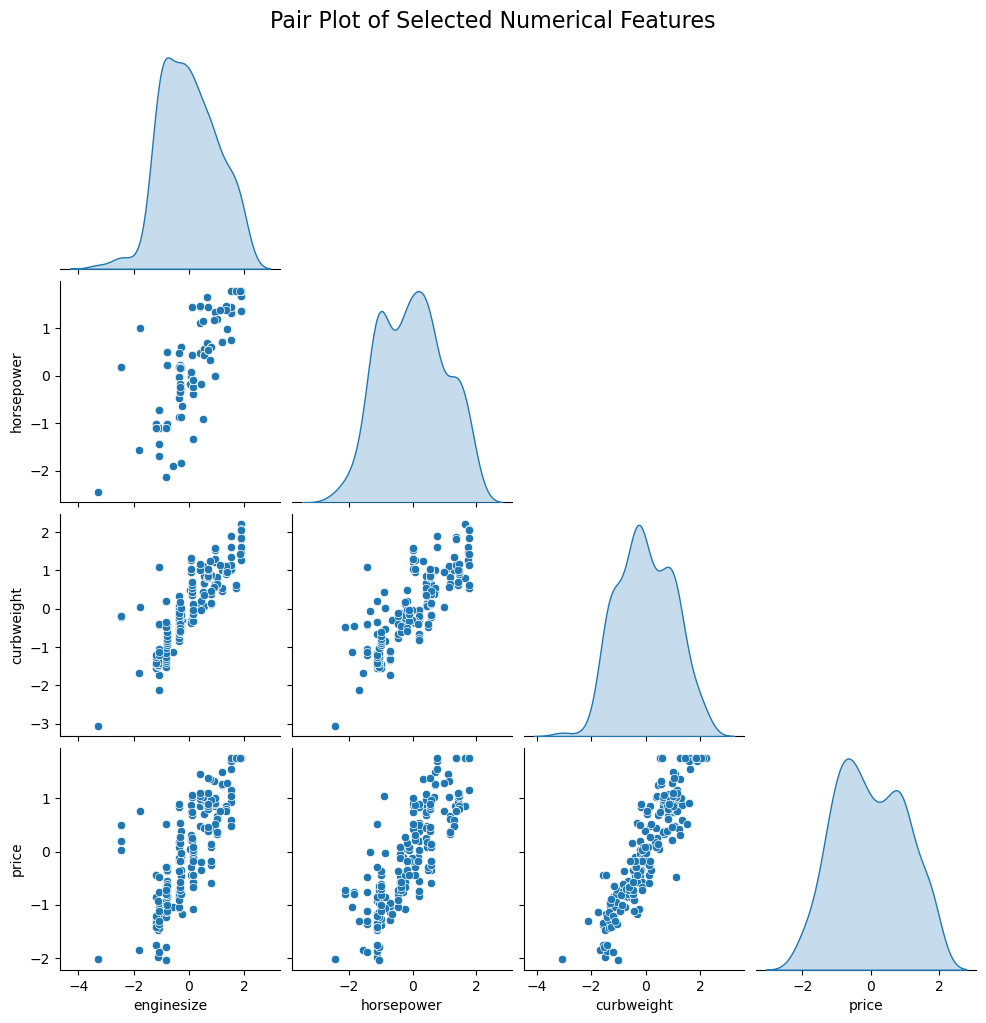

In [190]:
# Select a subset of numerical features for pair plot
selected_features = ['enginesize', 'horsepower', 'curbweight', 'price']  # Adjust based on your data
sns.pairplot(numerical_df[selected_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02, fontsize=16)
plt.show()


### (iii) Potential Patterns
Purpose: Identify trends in features like enginesize, horsepower, or curbweight that vary across target categories. This helps in understanding which features are important for predicting the target variable (e.g., price).

### Techniques:

Boxplots by Category: Show how numerical features (e.g., enginesize) vary across target categories, revealing significant differences.
Bar Plots: Use for categorical features to observe counts or averages by target groups.


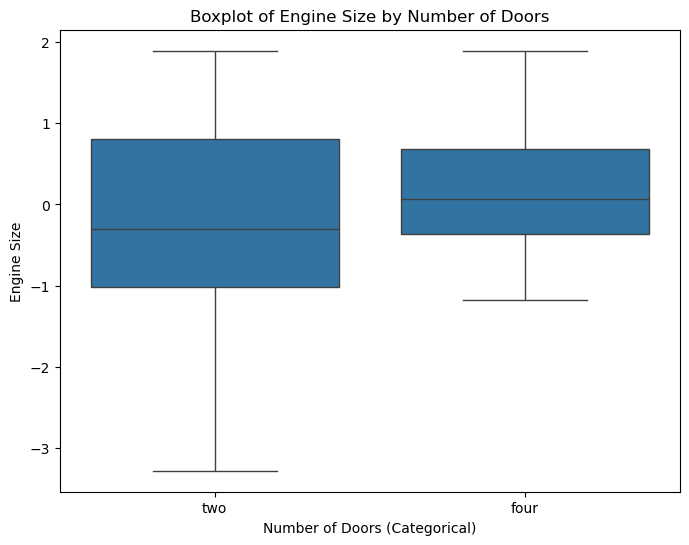

In [193]:
# Boxplot for a single feature ('enginesize') by a categorical target
plt.figure(figsize=(8, 6))
sns.boxplot(x='doornumber', y='enginesize', data=df_transformed)
plt.title('Boxplot of Engine Size by Number of Doors')
plt.xlabel('Number of Doors (Categorical)')
plt.ylabel('Engine Size')
plt.show()


# 7. Feature Engineering:
### Purpose:
Prepare the dataset for machine learning models by encoding categorical features into numerical formats. This ensures that models can interpret and utilize these features effectively.
### Why Encoding is Needed:
Machine learning models work with numerical data; encoding ensures categorical features are represented numerically without introducing bias.

### Techniques for Encoding:

One-Hot Encoding: Converts each category into a new binary column (useful for non-ordinal categorical variables like fueltype or aspiration).
Label Encoding: Assigns a unique integer to each category (useful for ordinal categorical variables like doornumber if order matters).
 

### Identify Categorical Columns

In [307]:
categorical_columns = df_transformed.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [309]:
# first few rows of categorical columns before encoding
print("Data Before Encoding:")
print(df_transformed[categorical_columns].head())


Data Before Encoding:
                    CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi  
4        4wd          front        ohc           five       mpfi  


## 1. Label Encoding Purpose (To encode ordinal features where the order matters)

In [311]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# copy of the transformed DataFrame
df_label_copy = df_transformed.copy()

# Initialize - LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Label Encoding for categorical features with ordinal relationships
label_encoded_features = ['CarName', 'aspiration', 'doornumber', 'cylindernumber']

for feature in label_encoded_features:
    df_label_copy[feature] = label_encoder.fit_transform(df_label_copy[feature])

    print(f"Label Encoded Output for '{feature}':")
    print(df_label_copy[[feature]].head())

Label Encoded Output for 'CarName':
   CarName
0        2
1        3
2        1
3        4
4        5
Label Encoded Output for 'aspiration':
   aspiration
0           0
1           0
2           0
3           0
4           0
Label Encoded Output for 'doornumber':
   doornumber
0           1
1           1
2           1
3           0
4           0
Label Encoded Output for 'cylindernumber':
   cylindernumber
0               2
1               2
2               3
3               2
4               1


### one-hot encoding

In [313]:
# One-Hot Encoding for categorical features without ordinal relationships
one_hot_encoded_features = ['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

for feature in one_hot_encoded_features:
    # Perform one-hot encoding
    encoded_array = one_hot_encoder.fit_transform(df_label_copy[[feature]])
    encoded_columns = one_hot_encoder.get_feature_names_out([feature])
    
    # Add the encoded columns to the DataFrame
    df_label_copy = pd.concat(
        [df_label_copy, pd.DataFrame(encoded_array, columns=encoded_columns, index=df_label_copy.index)],
        axis=1
    )
    
    print(f"One-Hot Encoded Columns for '{feature}':")
    print(pd.DataFrame(encoded_array, columns=encoded_columns).head())
    print("-" * 50)  # Separator for clarity


One-Hot Encoded Columns for 'fueltype':
   fueltype_diesel  fueltype_gas
0              0.0           1.0
1              0.0           1.0
2              0.0           1.0
3              0.0           1.0
4              0.0           1.0
--------------------------------------------------
One-Hot Encoded Columns for 'carbody':
   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                  1.0              0.0                0.0            0.0   
1                  1.0              0.0                0.0            0.0   
2                  0.0              0.0                1.0            0.0   
3                  0.0              0.0                0.0            1.0   
4                  0.0              0.0                0.0            1.0   

   carbody_wagon  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
--------------------------------------------------
One-Hot Encoded Columns for 'drivewheel':
  

In [315]:
# Drop the original categorical columns
df_onehot = df_label_copy.drop(columns=label_encoded_features + one_hot_encoded_features)


# 8. Feature Selection:
 - Use algorithms like Random Forest and Select K Best to identify relevant
features.
 - Remove redundant or irrelevant features

### Define the target (y) and features (X)

In [317]:

y = df_onehot['price']
X = df_onehot.drop(columns=['price'])

# Print shapes and verify encoding
print("Shape of X (Features):", X.shape)
print("Shape of y (Target):", y.shape)
print("\nList of Columns After Encoding:")
print(X.columns)

Shape of X (Features): (205, 42)
Shape of y (Target): (205,)

List of Columns After Encoding:
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_diesel', 'fueltype_gas', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')


In [289]:
df_onehot.head() ### updated after encoding

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-2.080970,1.637336,-2.388079,-0.404369,-3.885781e-15,-2.067534,0.144823,0.378551,0.525135,-1.943130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.035319,1.637336,-2.388079,-0.404369,-3.885781e-15,-2.067534,0.144823,0.378551,0.525135,-1.943130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.993838,0.194880,-0.703782,-0.205730,-3.608225e-16,-0.533373,0.647098,0.937844,-2.448083,0.740436,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.955206,0.939497,0.364326,0.233459,1.221245e-15,0.249497,-0.303501,-0.322568,-0.510857,0.463833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.918703,0.939497,0.294959,0.233459,1.609823e-15,0.249497,0.648780,0.545752,-0.510857,0.463833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection Using VarianceThreshold

In [323]:
# 1.1 Variance Threshold
var_threshold = VarianceThreshold(threshold=0.1)
X_var = var_threshold.fit_transform(X)
var_selected = X.columns[var_threshold.get_support()].tolist()

print("1. Filter Methods Results:")
print("\na) Variance Threshold")
print(f"Features selected: {len(var_selected)}")
print("Selected features:", var_selected[:5], "...")

1. Filter Methods Results:

a) Variance Threshold
Features selected: 22
Selected features: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carheight'] ...


### (i). Random Forest for Feature Importance (Regression)
Here this helps to identify the most impactful features for prediction.

In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [334]:
# Random Forest for Feature Importance (Regression)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_var, y)

# Get feature importance scores
importances = rf.feature_importances_
important_features = [var_selected[i] for i in importances.argsort()[::-1]]

print("\nTop features from Random Forest:")
print("Important features:", important_features[:10])  # Show top 10 important features




Top features from Random Forest:
Important features: ['curbweight', 'highwaympg', 'enginesize', 'horsepower', 'car_ID', 'carlength', 'wheelbase', 'citympg', 'carbody_hatchback', 'stroke']


### (ii) Select K Best for feature selection

In [339]:

# Select K Best for feature selection (Regression)
k_best = SelectKBest(f_regression, k=10)  # Selecting top 10 features
X_selected = k_best.fit_transform(X_var, y)  # Apply SelectKBest with regression scoring

# Show selected features
selected_features = pd.DataFrame(X_var, columns=var_selected).columns[k_best.get_support()]
print("\nTop features from SelectKBest:")
print(selected_features.tolist())  # Show selected features as a list



Top features from SelectKBest:
['carlength', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi']


# 9. Split Data into Training and Testing Sets:
- Divide the dataset into training and testing subsets.

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [348]:
# Split data into training and testing subsets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)


Training data shape: (164, 10) (164,)
Testing data shape: (41, 10) (41,)


# 10. Feature Scaling:
Scale numerical features if necessary to ensure uniform magnitude using techniques like Min-Max scaling or Standardization.

In [351]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [353]:
# Create scalers
standard_scaler = StandardScaler()  #standardized : entire data into standard form
minmax_scaler = MinMaxScaler()      # minmax : entire data into normalized form

In [355]:
# Apply scaling to training data
X_standardized = standard_scaler.fit_transform(x_train)  
X_normalized = minmax_scaler.fit_transform(x_train)    

In [357]:
# Convert scaled arrays back into DataFrames with original column names
X_standardized_df = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized_df = pd.DataFrame(X_normalized, columns=selected_features)

In [359]:
# now we can visualize or use these DataFrames
print(X_standardized_df.head())
print(X_normalized_df.head())

   carlength  curbweight  enginesize  horsepower   citympg  highwaympg  \
0   0.099199    0.435581    0.513199   -0.959258  0.981000    1.280299   
1   1.045499    1.062623    0.070591   -0.018152 -1.000486   -1.034229   
2  -0.345636   -0.456383   -1.132247   -1.515996  0.981000    1.009769   
3  -0.723165   -1.300726   -0.876168   -1.114067  0.981000    1.009769   
4  -0.533443   -0.434553   -0.301107   -0.343017  0.418794    0.438757   

   drivewheel_fwd  drivewheel_rwd  fuelsystem_2bbl  fuelsystem_mpfi  
0       -1.173376        1.266165        -0.671809        -0.952353  
1       -1.173376        1.266165        -0.671809         1.050031  
2        0.852242       -0.789786         1.488518        -0.952353  
3        0.852242       -0.789786         1.488518        -0.952353  
4        0.852242       -0.789786        -0.671809        -0.952353  
   carlength  curbweight  enginesize  horsepower   citympg  highwaympg  \
0   0.556351    0.551187    0.679465    0.311365  0.695926   

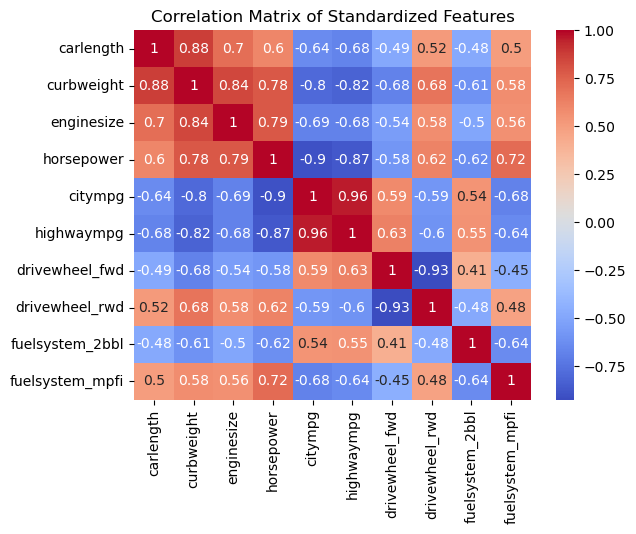

In [361]:
correlation = X_standardized_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Standardized Features")
plt.show()

# 11. Build the ML Model: (at least 5)
Implement various regression algorithms:
- Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

## (i) Linear Regression

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [370]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [374]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [376]:
# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [378]:
y_pred=model.predict(x_test)

# 12. Model Evaluation:

In [381]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [383]:
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

mae: 0.2926269280082387
mse: 0.1622682047937079
rmse: 0.402825278245678
r2: 0.833525858649512


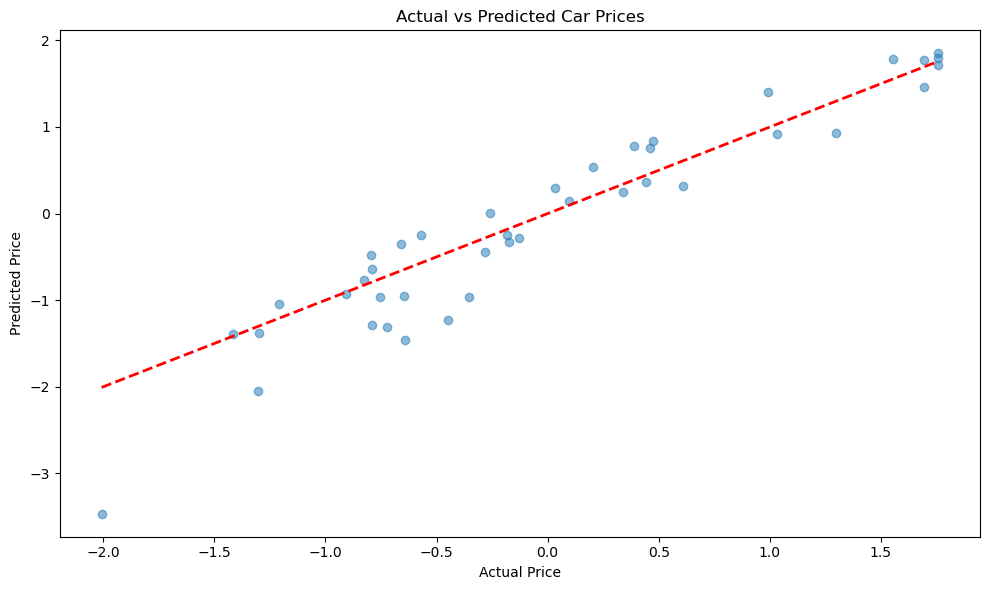

In [385]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

### (ii) Decision Tree Regressor

In [389]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [391]:
model1=DecisionTreeRegressor()

In [393]:
model1.fit(x_train, y_train)

DecisionTreeRegressor()

In [395]:
y_pred1=model1.predict(x_test)

# 12. Model Evaluation:

In [397]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred1)

In [399]:
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

mae: 0.23953531319785248
mse: 0.12324265565608963
rmse: 0.35105933352652746
r2: 0.8735629367183525


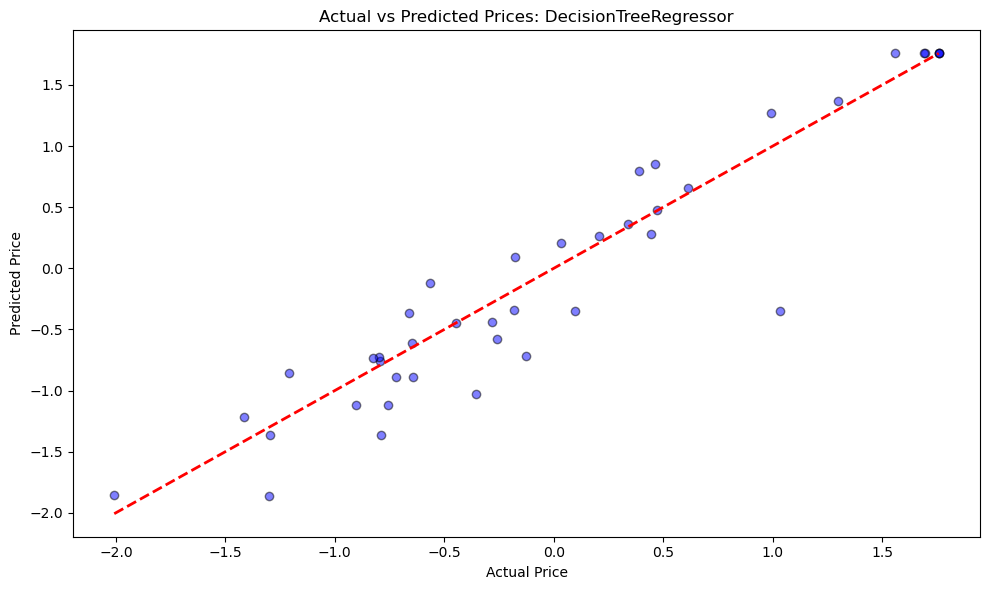

In [447]:
# Visualize actual vs predicted prices for DecisionTreeRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, alpha=0.5, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices: DecisionTreeRegressor')
plt.tight_layout()
plt.show()



### (iii) RandomForest Regressor

In [406]:
# Create and train the RandomForestRegressor model
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)


RandomForestRegressor()

In [408]:
# Predict using the test set
y_pred2 = model2.predict(x_test)

# 12. Model Evaluation:

In [410]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred2)

In [412]:
# Print the results
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('r2:', r2)

mae: 0.19571642868872405
mse: 0.05782126170582846
rmse: 0.24046052005647092
r2: 0.9406800308999728


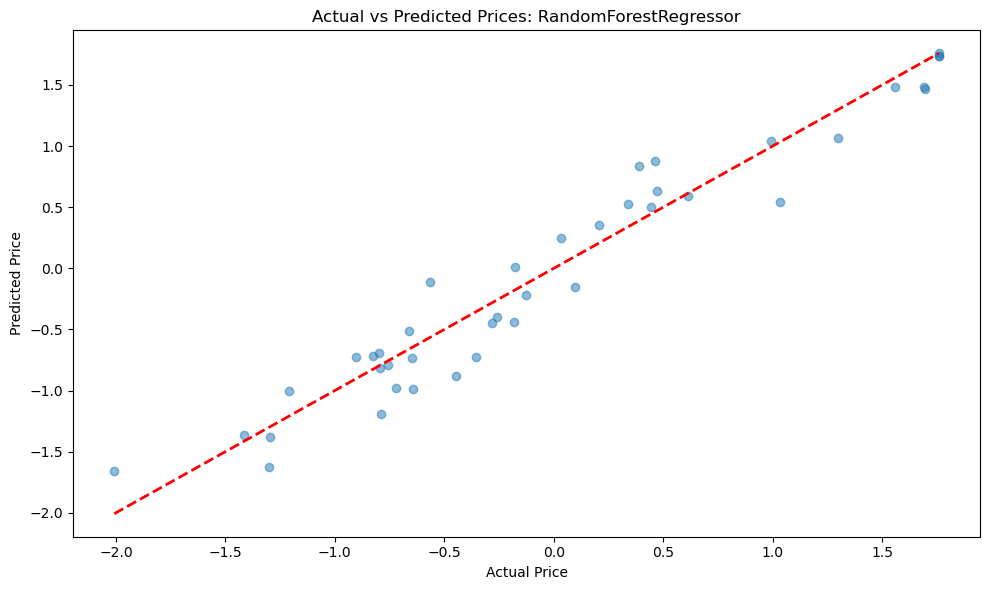

In [414]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices: RandomForestRegressor')
plt.tight_layout()
plt.show()

### (iv) Gradient Boosting Regressor model

In [417]:
# Create and train the GradientBoostingRegressor model
model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)


GradientBoostingRegressor()

In [419]:
# Predict using the test set
y_pred3 = model3.predict(x_test)

# 12. Model Evaluation:

In [421]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred3)

In [423]:
# Print the results
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('r2:', r2)

mae: 0.20433818994986552
mse: 0.06704329002022566
rmse: 0.2589271905772464
r2: 0.9312189707551286


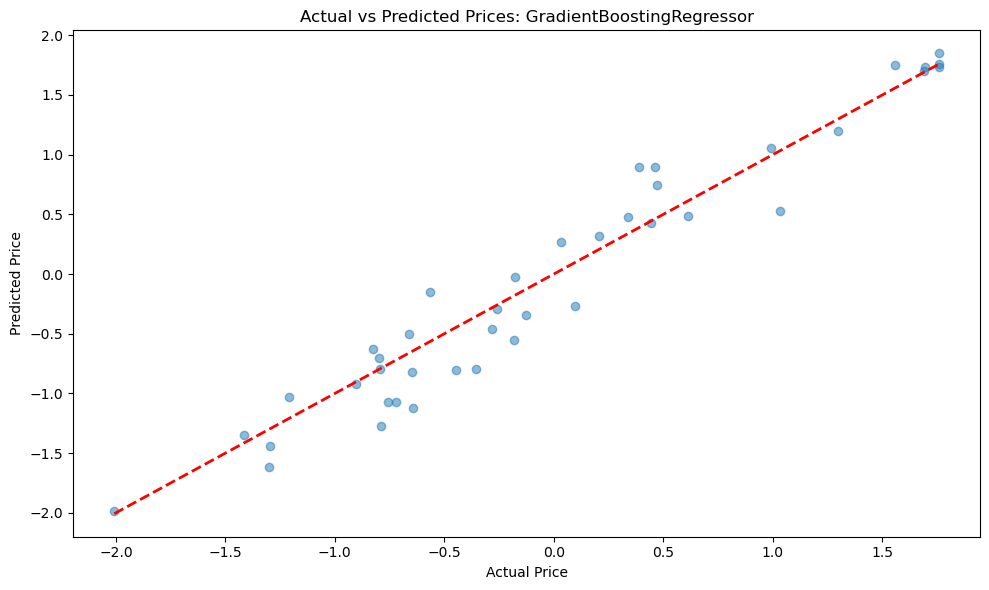

In [425]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices: GradientBoostingRegressor')
plt.tight_layout()
plt.show()

### (v) SVR model

In [428]:
# Create and train the SVR model
model4 = SVR()
model4.fit(x_train, y_train)


SVR()

In [430]:
# Predict using the test set
y_pred4 = model4.predict(x_test)

# 12. Model Evaluation:

In [432]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred4)

In [434]:
# Print the results
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('r2:', r2)


mae: 0.27771014611320466
mse: 0.14084835451669162
rmse: 0.37529768786483564
r2: 0.8555009041444417


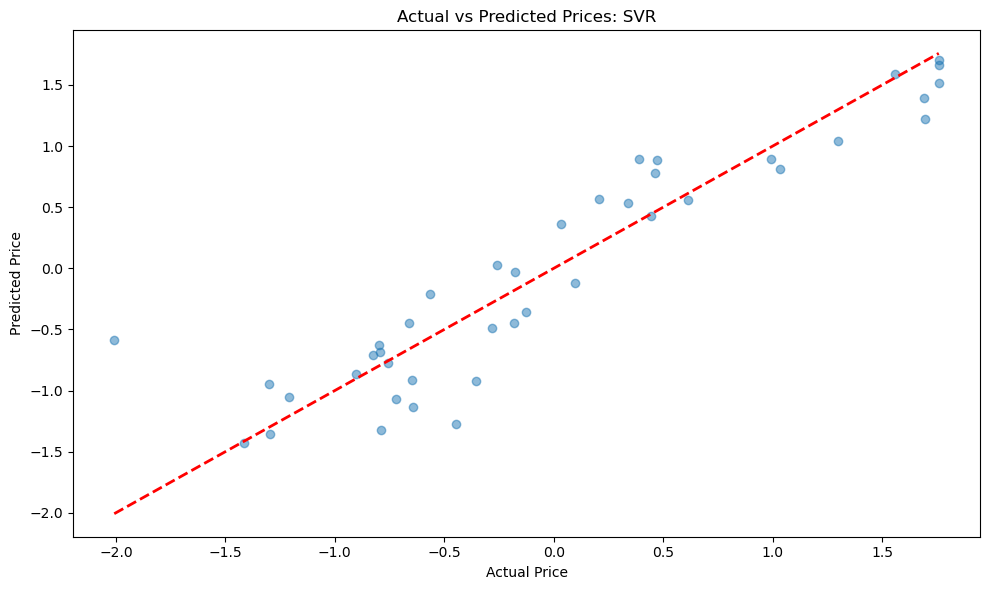

In [436]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred4, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices: SVR')
plt.tight_layout()
plt.show()

#### The Random Forest Regressor is the best model because it has the highest R² (0.9406), lowest RMSE (0.2404), and lowest MAE (0.1957), indicating it predicts car prices most accurately with minimal errors and explains the data variance effectively.

# 13. Hyperparameter Tuning:
 - Optimize model performance by tuning hyperparameters.

## Hyperparameter Tuning for Random Forest Regressor with GridSearchCV

In [468]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest Regressor
rf_param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with R^2 as the scoring metric
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='r2')
rf_grid.fit(x_train, y_train)

# Best parameters and R^2 score
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest R^2 Score:", rf_grid.best_score_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest R^2 Score: 0.8912338727259093


## Hyperparameter Tuning for Decision Tree Regressor with GridSearchCV

In [470]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree Regressor
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with R^2 as the scoring metric
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='r2')
dt_grid.fit(x_train, y_train)

# Best parameters and R^2 score
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree R^2 Score:", dt_grid.best_score_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree R^2 Score: 0.8370239325186786


## Hyperparameter Tuning for Gradient Boosting Regressor with GridSearchCV¶

In [472]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with R^2 as the scoring metric
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='r2')
gb_grid.fit(x_train, y_train)

# Best parameters and R^2 score
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best Gradient Boosting R^2 Score:", gb_grid.best_score_)


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Gradient Boosting R^2 Score: 0.8984986992381984


## Hyperparameter Tuning for SVR with GridSearchCV¶


In [473]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
svr_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'C': [0.1, 1, 10],                   # Regularization parameter
    'gamma': ['scale', 'auto'],          # Kernel coefficient
    'degree': [2, 3, 4]                  # Degree for 'poly' kernel
}

# Perform Grid Search with R^2 as the scoring metric
svr_grid = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='r2')
svr_grid.fit(x_train, y_train)

# Best parameters and R^2 score
print("Best SVR Parameters:", svr_grid.best_params_)
print("Best SVR R^2 Score:", svr_grid.best_score_)


Best SVR Parameters: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVR R^2 Score: 0.8969733343241184


### Before tuning, Random Forest Regressor was the best with R² = 0.94. After tuning, its performance decreased to R² = 0.891. Default parameters worked better

# 14. Save the Model:
 - Save the trained model for future use.

In [481]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Define the best model before hyperparameter tuning
best_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model on the entire training data
best_model.fit(x_train, y_train)

# Save the best model to a file
joblib.dump(best_model, 'best_model_before_tuning.pkl')

# Print the best model details
print("Best Model Details (Before Tuning):")
print(best_model)

print("Model saved as 'best_model_before_tuning.pkl'")


Best Model Details (Before Tuning):
RandomForestRegressor(random_state=42)
Model saved as 'best_model_before_tuning.pkl'


# 15. Test with Unseen Data:
 - Assess the model's performance on unseen data

In [484]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the saved model
loaded_model = joblib.load('best_model_before_tuning.pkl')  # Replace with the correct file name

# Predict on unseen test data
y_pred = loaded_model.predict(x_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Evaluation Metrics on Test Data:
Mean Absolute Error (MAE): 0.20450141408553105
Mean Squared Error (MSE): 0.06438636551889024
Root Mean Squared Error (RMSE): 0.25374468569585895
R² Score: 0.9339447618338874


# 16. Interpretation of Results (Conclusion):


In [487]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Conclusion based on R² score
if r2 > 0.85:
    print("The model is performing well with high predictive accuracy.")
elif r2 > 0.70:
    print("The model is performing decently, but there is room for improvement.")
else:
    print("The model's performance is poor, further tuning or model revision is required.")


Evaluation Metrics on Test Data:
Mean Absolute Error (MAE): 0.2045
Mean Squared Error (MSE): 0.0644
Root Mean Squared Error (RMSE): 0.2537
R² Score: 0.9339
The model is performing well with high predictive accuracy.
